# import libraries

In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# Read Dataset

In [39]:
trd = pd.read_csv('training_set (1).csv')
trd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
tsd = pd.read_csv('testing_set (2).csv')
tsd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Data Processing and Feature selection

In [41]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [42]:
tsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [43]:
trd.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [44]:
tsd.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [45]:
len(trd)

614

In [46]:
len(tsd)

367

In [47]:
trd.shape

(614, 13)

In [48]:
tsd.shape

(367, 12)

In [49]:
# Missing Data Treatment

In [50]:
trd.isna().sum() # checking training dataset

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
def missing(df):
    for i in df.columns:
        if(df[i].dtypes == 'object'):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [52]:
missing(trd)

In [53]:
trd.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
tsd.isna().sum() # checking testing dataset

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [55]:
missing(tsd)

In [56]:
tsd.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [57]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [58]:
# cheking relation between 1cat, 1 con columns


from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


anova_lm(ols('ApplicantIncome ~ Loan_Status',trd).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Loan_Status,1.0,5.612119e+05,5.612119e+05,0.015014,0.902518
Residual,612.0,2.287596e+10,3.737901e+07,NaN,NaN


In [59]:
def ANOVA(df,con,cat):
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm

    rel = con + '~' + cat
    model = ols(rel,df).fit()
    Q = anova_lm(model)
    pval = Q.iloc[0,4]
    return pval

In [60]:
round(ANOVA(trd,'LoanAmount','Loan_Status'),4)

0.3677

In [61]:
round(ANOVA(trd,'ApplicantIncome' , 'Loan_Status'),4)

0.9025

In [62]:
round(ANOVA(trd,'CoapplicantIncome','Loan_Status'),4)

0.1424

In [63]:
round(ANOVA(trd,'LoanAmount','Loan_Status'),4)

0.3677

In [64]:
round(ANOVA(trd,'Loan_Amount_Term','Loan_Status'),4)

0.604

In [65]:
round(ANOVA(trd,'Credit_History','Loan_Status'),4)

0.0

In [66]:
cat = []
con = []
for i in tsd.columns:
    if(tsd[i].dtypes == 'object'):
        cat.append(i)
    else:
        con.append(i)

In [67]:
# checking relation between 2 categorcial columns (using chisquare test)

In [68]:
cat = []
con = []
for i in trd.columns:
    if(trd[i].dtypes == 'object'):
        cat.append(i)
    else:
        con.append(i)

In [69]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [71]:
trd[cat]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [72]:
cat.remove('Loan_Status')
cat.remove('Loan_ID')

In [76]:
cat.append('Credit_History')
con.remove('Credit_History')

In [79]:
trd['Income'] = trd['ApplicantIncome'] + trd['CoapplicantIncome']
trd["Income"]

0      5849.00000
1      6913.54085
2      3000.00000
3      4941.00000
4      6000.00000
          ...    
609    2900.00000
610    4106.00000
611    8312.00000
612    7583.00000
613    4583.00000
Name: Income, Length: 614, dtype: float64

In [81]:
from scipy.stats import chi2_contingency
chisqu,pval,dof,conTab = chi2_contingency(pd.crosstab(trd['Gender'],trd['Loan_Status']))

In [82]:
chisqu

0.11087854691241235

In [83]:
def chisquare(df,cat1,cat2):
    from scipy.stats import chi2_contingency
    chisqu,pval,dof,conTab = chisqu,pval,dof,conTab = chi2_contingency(pd.crosstab(trd[cat1],trd[cat2]))
    return pval

In [84]:
for i in cat:
    print('Loan_Status Vs',i,':---->',round(chisquare(cat,'Loan_Status',i),5))

Loan_Status Vs Gender :----> 0.73915
Loan_Status Vs Married :----> 0.02961
Loan_Status Vs Dependents :----> 0.36887
Loan_Status Vs Education :----> 0.0431
Loan_Status Vs Self_Employed :----> 1.0
Loan_Status Vs Property_Area :----> 0.00214
Loan_Status Vs Credit_History :----> 0.0


In [85]:
# checking correlation between continuous columns

trd.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Income
ApplicantIncome,1.000000,-0.116625,0.565552,-0.045147,-0.014323,0.893033
CoapplicantIncome,-0.116625,1.000000,0.187884,-0.059710,-0.001720,0.342770
LoanAmount,0.565552,0.187884,1.000000,0.038801,-0.007738,0.620068
Loan_Amount_Term,-0.045147,-0.059710,0.038801,1.000000,0.001395,-0.069757
Credit_History,-0.014323,-0.001720,-0.007738,0.001395,1.000000,-0.014327
Income,0.893033,0.342770,0.620068,-0.069757,-0.014327,1.000000


In [86]:
tsd.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.490174,0.023187,0.094083
CoapplicantIncome,-0.110335,1.000000,0.150112,-0.010940,-0.066798
LoanAmount,0.490174,0.150112,1.000000,0.093856,-0.011405
Loan_Amount_Term,0.023187,-0.010940,0.093856,1.000000,-0.052370
Credit_History,0.094083,-0.066798,-0.011405,-0.052370,1.000000


# EDA

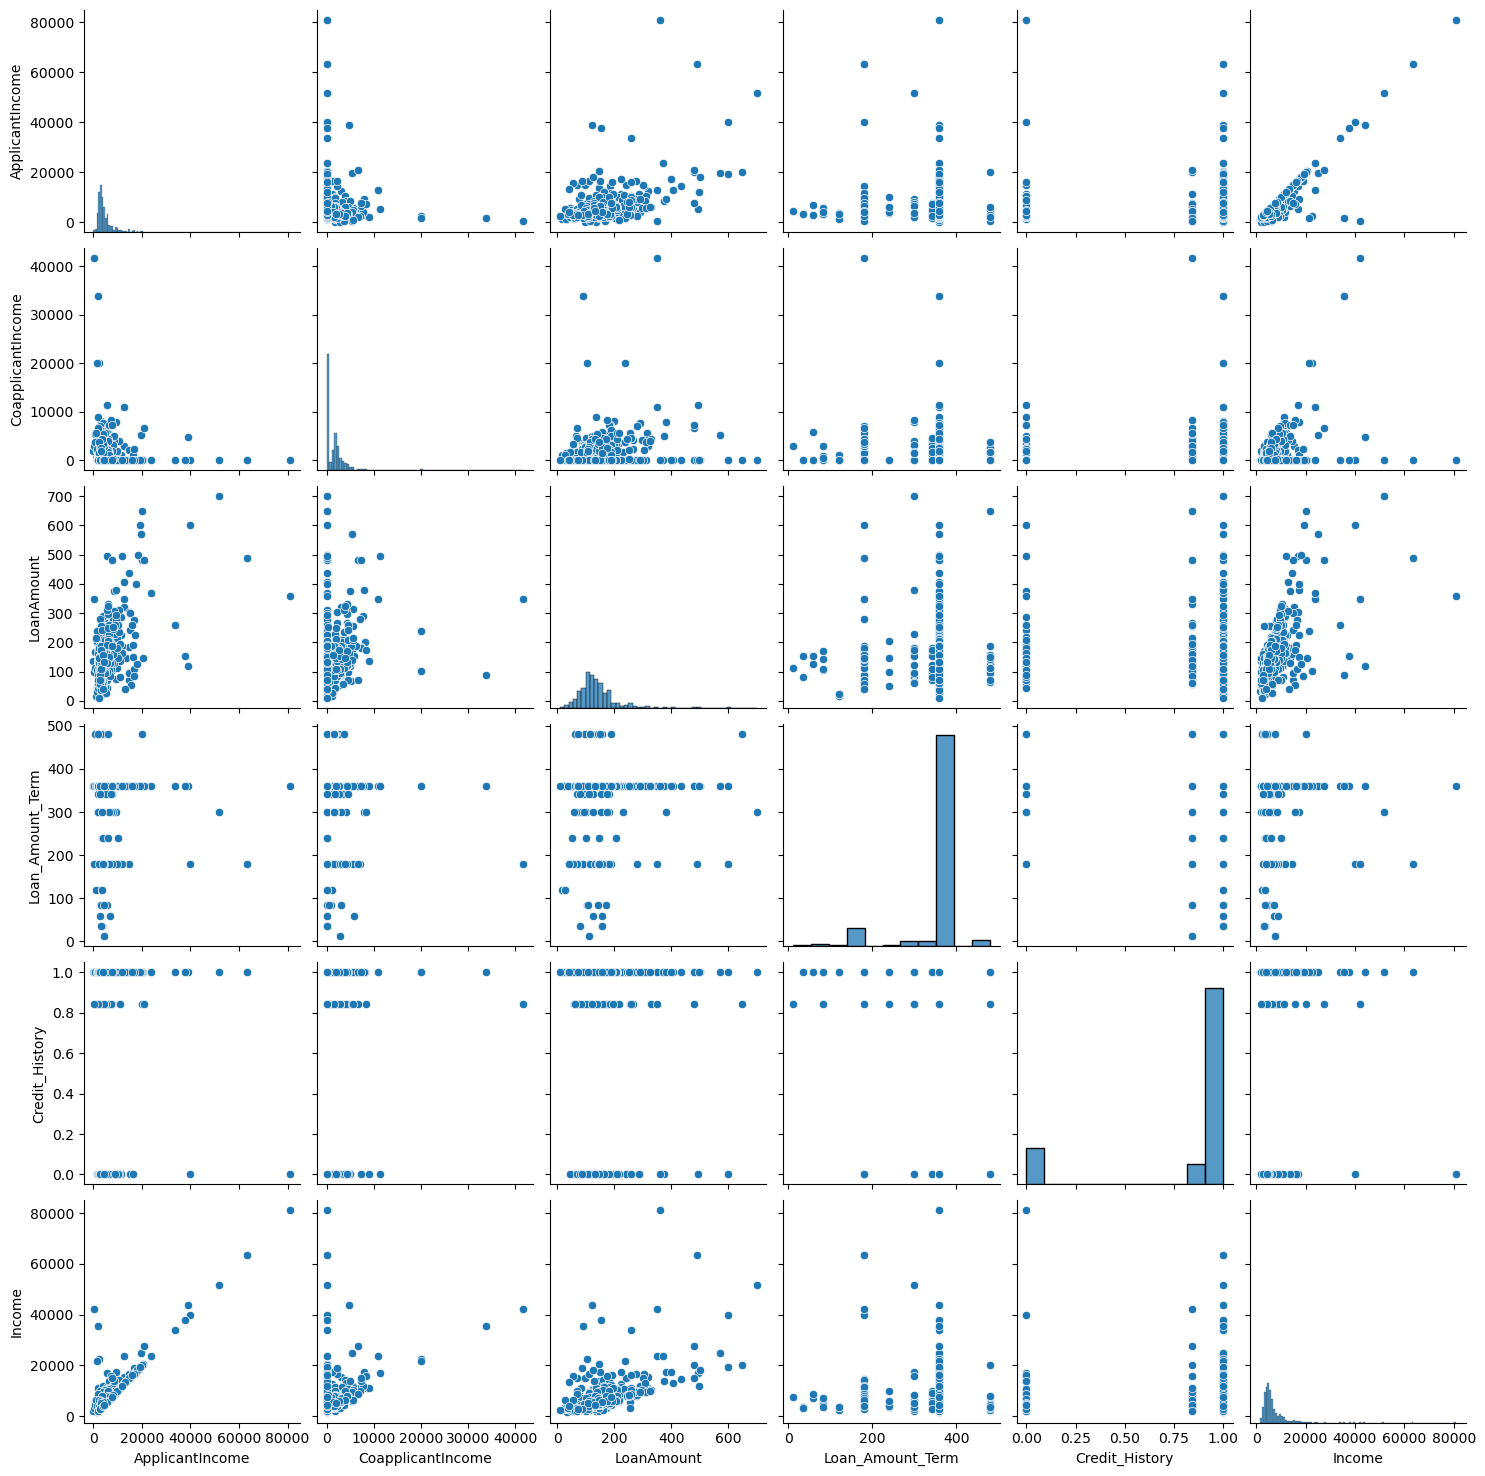

In [87]:
sns.pairplot(trd)

In [88]:
trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Income             614 non-null    float64
dtypes: float64(6), object(8)
memory usage: 67.3+ KB


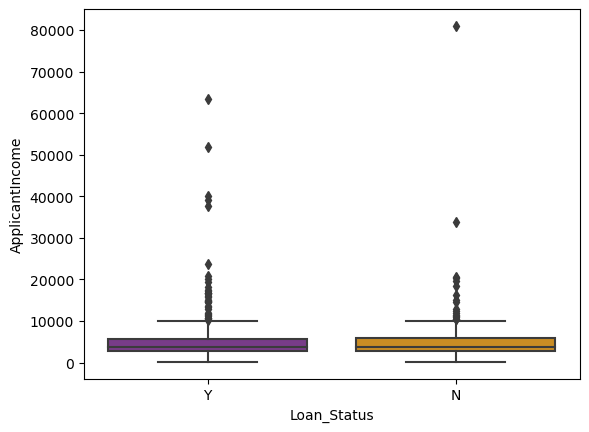

In [89]:
sns.boxplot(trd['Loan_Status'],trd['ApplicantIncome'],palette='CMRmap',color='r')
plt.show()

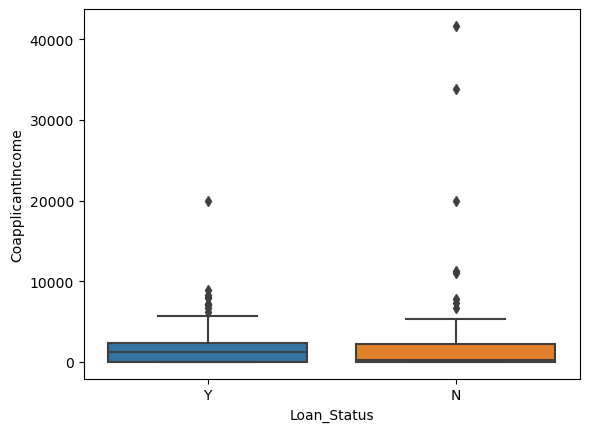

In [90]:
sns.boxplot(trd['Loan_Status'],trd['CoapplicantIncome'])
plt.show()

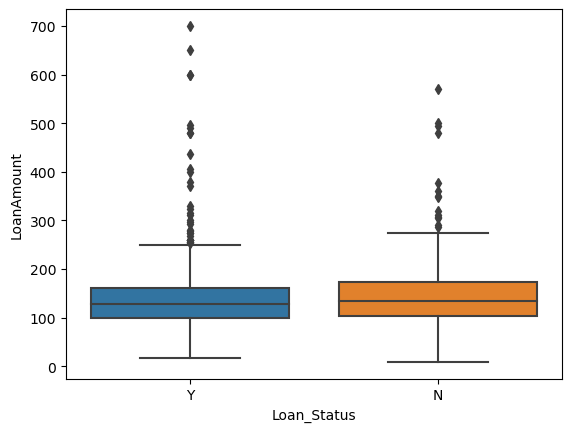

In [91]:
sns.boxplot(trd['Loan_Status'],trd['LoanAmount'])
plt.show()

In [92]:
trd.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Income
ApplicantIncome,1.000000,-0.116625,0.565552,-0.045147,-0.014323,0.893033
CoapplicantIncome,-0.116625,1.000000,0.187884,-0.059710,-0.001720,0.342770
LoanAmount,0.565552,0.187884,1.000000,0.038801,-0.007738,0.620068
Loan_Amount_Term,-0.045147,-0.059710,0.038801,1.000000,0.001395,-0.069757
Credit_History,-0.014323,-0.001720,-0.007738,0.001395,1.000000,-0.014327
Income,0.893033,0.342770,0.620068,-0.069757,-0.014327,1.000000


In [93]:
len(trd[cat])

614

In [94]:
trd

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y,5849.00000
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N,6913.54085
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y,3000.00000
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y,4941.00000
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y,6000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.00000,0.0,71.000000,360.0,1.0,Rural,Y,2900.00000
610,LP002979,Male,Yes,3+,Graduate,No,4106.00000,0.0,40.000000,180.0,1.0,Rural,Y,4106.00000
611,LP002983,Male,Yes,1,Graduate,No,8072.00000,240.0,253.000000,360.0,1.0,Urban,Y,8312.00000
612,LP002984,Male,Yes,2,Graduate,No,7583.00000,0.0,187.000000,360.0,1.0,Urban,Y,7583.00000


# Define X and Y

In [95]:
Y = trd[['Loan_Status']]
X = trd.drop(labels=['Loan_Status','Loan_ID','ApplicantIncome','CoapplicantIncome'],axis=1)

In [99]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == 'object'):
        cat.append(i)
    else:
        con.append(i)

In [98]:
X[con]

,LoanAmount,Loan_Amount_Term,Credit_History,Income
0,146.412162,360.0,1.0,5849.00000
1,128.000000,360.0,1.0,6913.54085
2,66.000000,360.0,1.0,3000.00000
3,120.000000,360.0,1.0,4941.00000
4,141.000000,360.0,1.0,6000.00000
...,...,...,...,...
609,71.000000,360.0,1.0,2900.00000
610,40.000000,180.0,1.0,4106.00000
611,253.000000,360.0,1.0,8312.00000
612,187.000000,360.0,1.0,7583.00000


In [100]:
cat.append('Credit_History')
con.remove('Credit_History')

In [102]:
X[con]

,LoanAmount,Loan_Amount_Term,Income
0,146.412162,360.0,5849.00000
1,128.000000,360.0,6913.54085
2,66.000000,360.0,3000.00000
3,120.000000,360.0,4941.00000
4,141.000000,360.0,6000.00000
...,...,...,...
609,71.000000,360.0,2900.00000
610,40.000000,180.0,4106.00000
611,253.000000,360.0,8312.00000
612,187.000000,360.0,7583.00000


In [75]:
# standardize the data

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)



In [76]:
# cat,con testing

cat = []
con = []
for i in tsd.columns:
    if(tsd[i].dtypes == 'object'):
        cat.append(i)
    else:
        con.append(i)

In [77]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X1_tsd = pd.DataFrame(ss.fit_transform(tsd[con]),columns=con)
X2_tsd = pd.get_dummies(tsd[cat])
Xnew_tsd = X1_tsd.join(X2_tsd)
Xnew_tsd

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.47918,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180807,0.270603,0.47918,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,-0.502774,0.418877,-0.593671,0.270603,0.00000,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.955139,0.270603,0.47918,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.162439,0.088982,-0.380077,0.270603,0.47918,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
363,-0.132056,-0.369180,-0.347216,0.270603,0.47918,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
364,-0.317211,0.181644,-0.166482,0.270603,0.00000,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
365,0.039641,0.353241,0.359289,0.270603,0.47918,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [78]:
Xnew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072651,-0.554368,0.000000,0.279851,0.451640,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,0.000000,-0.038610,-0.219273,0.279851,0.451640,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,0.451640,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,-0.462412,0.252103,-0.314547,0.279851,0.451640,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,0.097389,-0.554368,-0.064454,0.279851,0.451640,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410479,-0.554368,-0.898095,0.279851,0.451640,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
610,-0.212902,-0.554368,-1.267279,-2.518655,0.451640,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
611,0.436842,-0.472284,1.269371,0.279851,0.451640,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
612,0.356730,-0.554368,0.483367,0.279851,0.451640,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1


In [79]:
Xnew_tsd

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.47918,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180807,0.270603,0.47918,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,-0.502774,0.418877,-0.593671,0.270603,0.00000,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.955139,0.270603,0.47918,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.162439,0.088982,-0.380077,0.270603,0.47918,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
363,-0.132056,-0.369180,-0.347216,0.270603,0.47918,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
364,-0.317211,0.181644,-0.166482,0.270603,0.00000,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
365,0.039641,0.353241,0.359289,0.270603,0.47918,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [80]:
X1.shape

(614, 5)

In [81]:
X1_tsd.shape

(367, 5)

In [82]:
X2.shape

(614, 629)

In [83]:
X2_tsd.shape

(367, 382)

In [84]:
len(X1.columns),len(X1_tsd.columns)

(5, 5)

In [85]:
len(X2.columns),len(X2_tsd.columns)

(629, 382)

In [86]:
trd[cat].shape

(614, 7)

In [87]:
tsd[cat].shape

(367, 7)

In [88]:
trd[cat]['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [89]:
tsd[cat]['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [90]:
trd[cat]['Self_Employed']

0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object

In [91]:
tsd[cat]['Self_Employed']

0       No
1       No
2       No
3       No
4       No
      ... 
362    Yes
363     No
364     No
365     No
366    Yes
Name: Self_Employed, Length: 367, dtype: object

# Train_test_split

In [92]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Model Evalution

In [93]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)



In [94]:
# Pruning

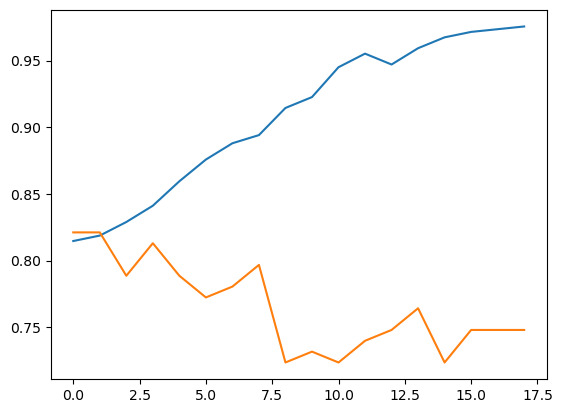

In [95]:
tr = []
ts = []
for i in range(2,20,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,max_depth=i)
    model = dtc.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)
plt.show()

In [96]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=1)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
tr_acc,ts_acc

(0.8065173116089613, 0.8211382113821138)

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
tr_acc,ts_acc

(0.814663951120163, 0.8211382113821138)

In [98]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=3)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
tr_acc,ts_acc

(0.8187372708757638, 0.8211382113821138)

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=4)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
tr_acc,ts_acc

(0.8289205702647657, 0.7886178861788617)

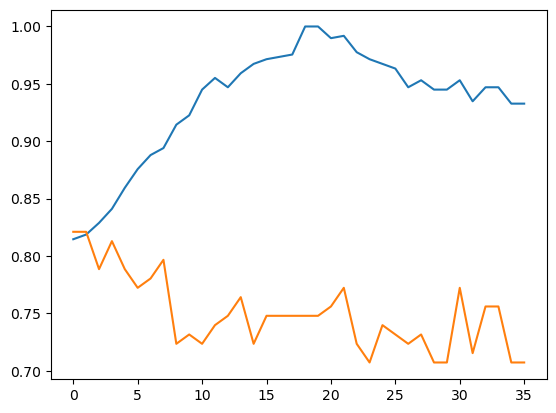

In [100]:
# pruning min_samples_split

for i in range(2,20,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_split=i)
    model = dtc.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)
plt.show()

In [101]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_split=2)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
round(tr_acc,3),round(ts_acc,3)

(1.0, 0.748)

In [102]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_split=20)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
tr_acc,ts_acc

(0.9429735234215886, 0.7560975609756098)

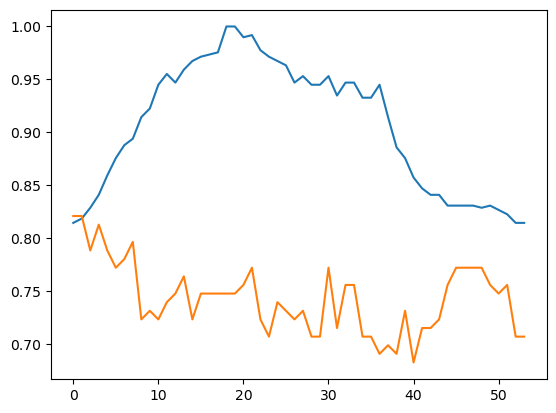

In [103]:
# pruning min_samples_leaf


for i in range(2,20,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=i)
    model = dtc.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)
plt.show()

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=5)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
tr_acc,ts_acc

(0.8757637474541752, 0.7317073170731707)

In [105]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=10)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
tr_acc,ts_acc

(0.8309572301425662, 0.7560975609756098)

In [106]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=13)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
tr_acc,ts_acc

(0.8309572301425662, 0.7723577235772358)

# Ploting a tree to choose best model

In [107]:
# best model

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
round(tr_acc,1),round(ts_acc,2)

(0.8, 0.82)

In [108]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
model = dtc.fit(Xnew,Y)

model

DecisionTreeClassifier(max_depth=2, random_state=21)

In [109]:
from sklearn.tree import export_graphviz
export_graphviz(dtc,out_file='Loan.out')

In [110]:
Q = list(Xnew.columns)

In [111]:
#  create moduler


from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=31)

def tree(mo):
    model = mo.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    return tr_acc,ts_acc

In [112]:
# Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40)
tree(rfc)

(1.0, 0.7967479674796748)

In [113]:
# Adaboost Boost classifier

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=50)
tree(abc)

(0.9775967413441955, 0.7560975609756098)

In [114]:
from sklearn.model_selection import GridSearchCV
forest_params = [{'max_depth': list(range(2, 8))}]

clf = GridSearchCV(rfc, forest_params, cv = 4, scoring='accuracy')

clf.fit(xtrain,ytrain)
print(clf.best_score_)

0.7006364121018259


In [115]:
# Logistic Regression


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model = lr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
round(tr_acc,2),round(ts_acc,2)

(0.81, 0.82)

In [116]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(Xnew,Y)

# Final Model

In [117]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)
tr_acc,ts_acc

(0.814663951120163, 0.8211382113821138)

In [118]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
model = dtc.fit(Xnew,Y)
model

DecisionTreeClassifier(max_depth=2, random_state=21)

In [119]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_ID_LP001002',
       'Loan_ID_LP001003', 'Loan_ID_LP001005', 'Loan_ID_LP001006',
       'Loan_ID_LP001008',
       ...
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object', length=634)

In [120]:
Xnew_tsd.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_ID_LP001015',
       'Loan_ID_LP001022', 'Loan_ID_LP001031', 'Loan_ID_LP001035',
       'Loan_ID_LP001051',
       ...
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object', length=387)

In [121]:
len(Xnew_tsd.columns)

387

In [134]:
len(Xnew.columns)

634